In [282]:
%reset -f

from skimage.io import imread, imsave, imshow, show

import numpy as np
from sklearn.cluster import KMeans

import os
os.system('rm guy_*'); # remove all existing images resulting from previous manipulations

In [283]:
# load the image and get its size in pixels
# NOTE: each pixel has RGB values -----> rgb = [R_value, G_value, B_value]

im = imread('guy.jpg')

xp = im.shape[0]
yp = im.shape[1]

print 'The dimensions of the image:', im.shape

The dimensions of the image: (411L, 466L, 3L)


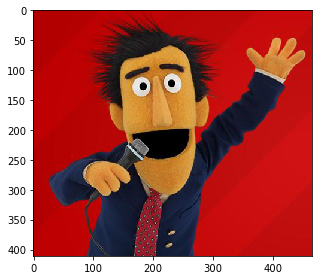

In [284]:
# display the original image
imshow('guy.jpg')
show()

In [285]:
# assign the average of the RGB values to each pixel -----> rgb = [mean(rgb),mean(rgb),mean(rgb)]

imAvg = np.zeros(im.shape)

for i in range(xp):
    for j in range(yp):
        mm = int(np.mean(im[i,j]))
        imAvg[i,j] = [mm ,mm, mm]
        
imAvg = np.array(imAvg, dtype='uint8')

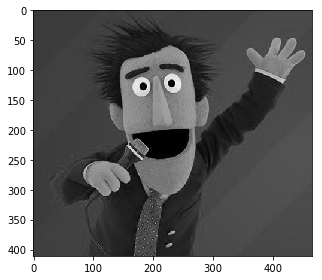

In [286]:
# display image with averaged RGB values
imshow(imAvg)
show()

### Color Reduction

In [287]:
# function to unroll a 3D array into a 2D array

def unrollArray(arr):
    resArr = []
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            resArr.append(list(arr[i,j]))
    return np.array(resArr)

In [288]:
# the unrolled 2D array
unrolledImPixels = unrollArray(im)

In [289]:
# cluster the RGB values of the pixels

numClust = 5 # number of clusters

theClusterModel = KMeans(n_clusters=numClust)
theClusterModel.fit(unrolledImPixels)

theCenters = theClusterModel.cluster_centers_
theLabels = theClusterModel.labels_

In [290]:
# reshape the resulting cluster labels into a 2D array (the same shape as the unrolled image pixel values)
imPixelLabels = theLabels.reshape(xp,yp)

In [291]:
# replace the RGB value of each pixel with the value of the centroid of its cluster
for i in range(xp):
    for j in range(yp):
        ind = imPixelLabels[i,j]
        im[i,j] = tuple([int(k) for k in theCenters[ind]])

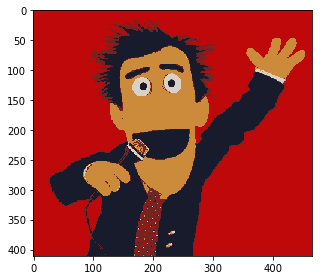

In [292]:
# display image with cluster-center RGB values
imshow(im)
show()